In [1]:
import pandas as pd
import numpy as np

X_train = pd.read_csv(r"/kaggle/input/student-performance-data-set-competition-form/X_train.csv") 
ytrain = pd.read_csv(r"/kaggle/input/student-performance-data-set-competition-form/y_train.csv")

X_test = pd.read_csv(r"/kaggle/input/student-performance-data-set-competition-form/X_test.csv")
ytest = pd.read_csv(r"/kaggle/input/student-performance-data-set-competition-form/test_label/y_test.csv")
X_train

,StudentID,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,1714,GP,F,18,U,GT3,T,4,3,other,...,no,4,3,3,1,1,3,0,14,13
1,1254,GP,F,17,U,GT3,T,4,3,health,...,yes,4,4,3,1,3,4,0,13,15
2,1639,GP,F,16,R,GT3,T,4,4,health,...,no,2,4,4,2,3,4,6,10,11
3,1118,GP,M,16,U,GT3,T,4,4,services,...,no,5,3,3,1,3,5,0,15,13
4,1499,GP,M,19,U,GT3,T,3,2,services,...,yes,4,5,4,1,1,4,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673,1074,GP,M,15,U,GT3,T,4,4,services,...,no,5,3,3,1,1,5,4,10,13
674,1044,GP,M,15,R,GT3,T,4,4,other,...,yes,1,3,5,3,5,1,8,12,10
675,1078,GP,M,17,U,LE3,T,4,4,other,...,no,4,1,1,2,2,5,0,12,13
676,1055,MS,M,17,R,GT3,T,1,1,other,...,yes,4,5,5,1,3,2,0,10,9


In [2]:
ytrain.drop('StudentID' , axis=1 , inplace= True)
ytest.drop('StudentID' , axis=1 , inplace= True)
ytrain

,G3
0,14
1,15
2,11
3,13
4,0
...,...
673,14
674,11
675,13
676,10


In [3]:
print("DataFrame Information:")
print("-" * 30)
print('DF Shape: ' ,X_train.shape)
print('number of Columns: ' ,len(X_train.columns))
print('number of Observations: ' ,len(X_train))
print('Number of values in X_train: ' , X_train.count().sum())
print('Total Number of Missing values in X_train: ' , X_train.isna().sum().sum())
print('percentage of Missing values : ' ,  "{:.2f}".format(X_train.isna().sum().sum()/X_train.count().sum() *100),'%')
print('Total Number of Duplicated records in X_train : ' , X_train.duplicated().sum().sum())
print('percentage of Duplicated values : ' ,  "{:.2f}".format(X_train.duplicated().sum().sum()/X_train.count().sum() *100),'%')

DataFrame Information:
------------------------------
DF Shape:  (678, 33)
number of Columns:  33
number of Observations:  678
Number of values in X_train:  22374
Total Number of Missing values in X_train:  0
percentage of Missing values :  0.00 %
Total Number of Duplicated records in X_train :  0
percentage of Duplicated values :  0.00 %


In [4]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678 entries, 0 to 677
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   StudentID   678 non-null    int64 
 1   school      678 non-null    object
 2   sex         678 non-null    object
 3   age         678 non-null    int64 
 4   address     678 non-null    object
 5   famsize     678 non-null    object
 6   Pstatus     678 non-null    object
 7   Medu        678 non-null    int64 
 8   Fedu        678 non-null    int64 
 9   Mjob        678 non-null    object
 10  Fjob        678 non-null    object
 11  reason      678 non-null    object
 12  guardian    678 non-null    object
 13  traveltime  678 non-null    int64 
 14  studytime   678 non-null    int64 
 15  failures    678 non-null    int64 
 16  schoolsup   678 non-null    object
 17  famsup      678 non-null    object
 18  paid        678 non-null    object
 19  activities  678 non-null    object
 20  nursery   

In [5]:
X_train.nunique()

StudentID     678
school          2
sex             2
age             8
address         2
famsize         2
Pstatus         2
Medu            5
Fedu            5
Mjob            5
Fjob            5
reason          4
guardian        3
traveltime      4
studytime       4
failures        4
schoolsup       2
famsup          2
paid            2
activities      2
nursery         2
higher          2
internet        2
romantic        2
famrel          5
freetime        5
goout           5
Dalc            5
Walc            5
health          5
absences       31
G1             16
G2             16
dtype: int64

In [6]:
X_train.describe()

,StudentID,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
count,678.000000,678.000000,678.000000,678.000000,678.00000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.00000,678.000000
mean,1516.181416,16.719764,2.607670,2.371681,1.50590,1.989676,0.261062,3.933628,3.233038,3.140118,1.480826,2.293510,3.522124,4.594395,11.20649,11.182891
std,303.029891,1.239881,1.134682,1.096750,0.73675,0.848082,0.664340,0.952346,1.042083,1.165537,0.895789,1.287705,1.431430,6.527236,2.90395,3.296146
min,1001.000000,15.000000,0.000000,0.000000,1.00000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,4.00000,0.000000
25%,1253.250000,16.000000,2.000000,1.000000,1.00000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,9.00000,9.000000
50%,1508.000000,17.000000,3.000000,2.000000,1.00000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.00000,11.000000
75%,1780.750000,18.000000,4.000000,3.000000,2.00000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.00000,13.000000
max,2043.000000,22.000000,4.000000,4.000000,4.00000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.00000,19.000000


In [7]:
X_train.describe(include='O')

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,678,678,678,678,678,678,678,678,678,678,678,678,678,678,678,678,678
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,no,yes,yes,yes,no
freq,509,394,499,479,602,254,371,269,475,604,419,537,350,543,621,541,433


In [8]:
import plotly.express as px
px.histogram(ytrain)

In [9]:
from sklearn.preprocessing import LabelEncoder

cat_ft = []
for i in X_train.columns:
    if X_train[i].dtype == object :
        cat_ft.append(i)

le = LabelEncoder()
for i in cat_ft:
    le.fit(X_train[i] )
    X_train[i] = le.transform(X_train[i])
    X_test[i] = le.transform(X_test[i])

X_train

,StudentID,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,1714,0,0,18,1,0,1,4,3,2,...,0,4,3,3,1,1,3,0,14,13
1,1254,0,0,17,1,0,1,4,3,1,...,1,4,4,3,1,3,4,0,13,15
2,1639,0,0,16,0,0,1,4,4,1,...,0,2,4,4,2,3,4,6,10,11
3,1118,0,1,16,1,0,1,4,4,3,...,0,5,3,3,1,3,5,0,15,13
4,1499,0,1,19,1,0,1,3,2,3,...,1,4,5,4,1,1,4,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673,1074,0,1,15,1,0,1,4,4,3,...,0,5,3,3,1,1,5,4,10,13
674,1044,0,1,15,0,0,1,4,4,2,...,1,1,3,5,3,5,1,8,12,10
675,1078,0,1,17,1,1,1,4,4,2,...,0,4,1,1,2,2,5,0,12,13
676,1055,1,1,17,0,0,1,1,1,2,...,1,4,5,5,1,3,2,0,10,9


# Traditional Models

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

rf = RandomForestRegressor()
rf.fit(X_train, ytrain)

y_pred = rf.predict(X_train)
train_mse = mean_squared_error(ytrain, y_pred)
print("Train Mean Squared Error: {:.2f}".format(train_mse))


y_pred = rf.predict(X_test)
test_mse = mean_squared_error(ytest, y_pred)
print("Test Mean Squared Error: {:.2f}".format(test_mse))

/tmp/ipykernel_18/1448969972.py:6: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Train Mean Squared Error: 0.26
Test Mean Squared Error: 2.69


In [11]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(X_train, ytrain)

y_pred = dt.predict(X_train)
test_mse = mean_squared_error(ytrain, y_pred)
print("Test Mean Squared Error: {:.2f}".format(train_mse))

y_pred = dt.predict(X_test)
test_mse = mean_squared_error(ytest, y_pred)
print("Test Mean Squared Error: {:.2f}".format(test_mse))

Test Mean Squared Error: 0.26
Test Mean Squared Error: 3.67


# Deep Learning models

## Experiments:
- Experimenting with different architectures, including varying depths, widths, and activation
functions

- evaluating each Experiment with time taken to train, Number of epochs before early Stopping is called, R2 score, Mean Squared Error and Mean Absolute Percentage Error

In [12]:
import time
from sklearn.metrics import precision_recall_fscore_support
from tensorflow import keras
from tensorflow.keras import regularizers
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras import layers, models, regularizers, initializers
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import LeakyReLU
import tensorflow as tf

2024-03-13 15:03:04.101863: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-13 15:03:04.102044: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-13 15:03:04.282623: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [13]:
r2 = []
mape = []
mse = []

times = []
eps = []
train_mae = []
test_mea = []

historys = []
modelss = []

BatchSize = []
LRs = []
depth = []
act = []


In [14]:
from sklearn.model_selection import train_test_split
X_test , X_val , ytest , yval = train_test_split(X_test , ytest , train_size= 0.5)

In [15]:
from sklearn.metrics import r2_score , mean_squared_error , mean_absolute_percentage_error
def runmodel(model , BS , LR):
    depth.append(len(model.layers))
    BatchSize.append(BS)
    LRs.append(LR)
    start_time = time.time()
    model.compile(
        optimizer= tf.keras.optimizers.SGD(learning_rate=LR),
        loss='mae',
        metrics=['mae'],
    )
    

    early_stopping = keras.callbacks.EarlyStopping(
        patience=5,
        min_delta=0.001,
        restore_best_weights=True,
    )

    history = model.fit(
        X_train, ytrain,
        validation_data=(X_val, yval),
        batch_size=32,
        epochs=BS,
        callbacks=[early_stopping],
    )

    end_time = time.time()
    training_time = end_time - start_time
    times.append(training_time)
    eps.append(len(history.history['loss']))
    train_mae.append(history.history['mae'][-1])

    history_df = pd.DataFrame(history.history)
    history_df.loc[:, ['loss', 'val_loss']].plot(title="MAE")
    history_df.loc[:, ['mae', 'val_mae']].plot(title="MAE")

    eval = model.evaluate(X_test , ytest)
    print('Training Time: ' ,training_time)
    print('Test Loss and Accuracy : ' , eval)

    test_mea.append(eval[1])

    ypred = model.predict(X_test)

    r2.append(r2_score(ypred , ytest))
    mape.append(mean_absolute_percentage_error(ypred , ytest))
    mse.append(mean_squared_error(ypred , ytest))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/normalization/batch_normalization.py:143: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/32
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 10.8311 - mae: 10.8264 - val_loss: 11.0605 - val_mae: 11.0741
Epoch 2/32
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 10.6545 - mae: 10.6555 - val_loss: 11.0303 - val_mae: 11.0441
Epoch 3/32
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 10.9123 - mae: 10.9082 - val_loss: 10.9186 - val_mae: 10.9320
Epoch 4/32
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 10.8391 - mae: 10.8483 - val_loss: 10.8410 - val_mae: 10.8543
Epoch 5/32
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 10.6793 - mae: 10.6723 - val_loss: 10.7751 - val_mae: 10.7878
Epoch 6/32
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 10.7186 - mae: 10.7223 - val_loss: 10.7310 - val_mae: 10.7428
Epoch 7/32
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 10.6739 - mae: 10.6738 - val_loss: 10.6908 - val_mae: 10.7015
Epoch 8/32
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 10.7385 - mae: 10.7429 - val_loss: 10.6479 - val_mae: 10.6569
Epoch 9/32
22/22 ━━━━━━━━━━━━━━━━━━━━ 0

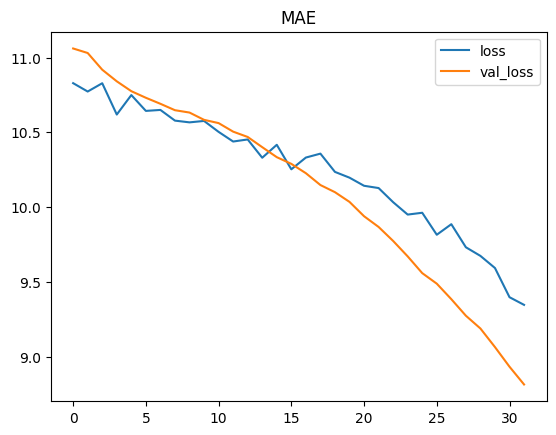

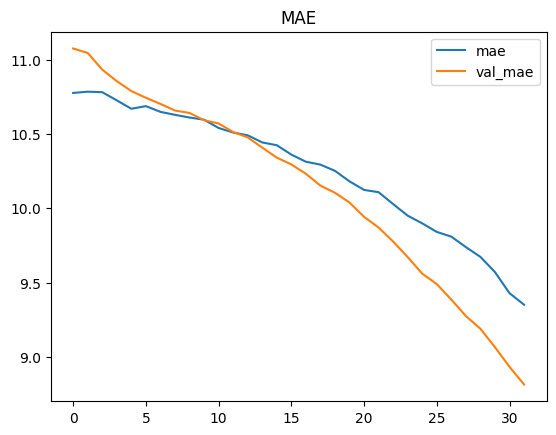

In [16]:
#Experiment 1:
depth.append(6)
act.append('Relu')

model = keras.Sequential([
    layers.BatchNormalization(input_shape=[X_train.shape[1]]),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),

    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),

    layers.Dense(512, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),

    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),

    layers.Dense(128, activation='relu' , ),
    layers.Dropout(0.3),
    layers.BatchNormalization(),   

    layers.Dense(1, activation='relu'),
])

runmodel(model , BS = 32 , LR= 0.001)

In [17]:
#Experiment 1:
depth.append(6)
act.append('Relu')

model = keras.Sequential([
    layers.BatchNormalization(input_shape=[X_train.shape[1]]),
    layers.Dense(512, activation=keras.layers.LeakyReLU(alpha=0.01) ,
                  kernel_initializer=initializers.GlorotNormal(),
                  kernel_regularizer= regularizers.l1_l2(l1=1e-5, l2=1e-4)),
    layers.Dropout(0.3),
    layers.BatchNormalization(),

    layers.Dense(512, activation=keras.layers.LeakyReLU(alpha=0.01) ,
                  kernel_initializer=initializers.GlorotNormal(),
                  kernel_regularizer= regularizers.l1_l2(l1=1e-5, l2=1e-4)),
    layers.Dropout(0.3),
    layers.BatchNormalization(),

    layers.Dense(512, activation=keras.layers.LeakyReLU(alpha=0.01) ,
                  kernel_initializer=initializers.GlorotNormal(),
                  kernel_regularizer= regularizers.l1_l2(l1=1e-5, l2=1e-4)),
    layers.Dropout(0.3),
    layers.BatchNormalization(),


    layers.Dense(1),
])
print(model.layers[1].activation)
# runmodel(model , BS = 64 , LR= 0.001)

<LeakyReLU name=leaky_re_lu, built=False>


/opt/conda/lib/python3.10/site-packages/keras/src/layers/normalization/batch_normalization.py:143: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

/opt/conda/lib/python3.10/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning:

Argument `alpha` is deprecated. Use `negative_slope` instead.

